In [2]:
import torch

In [3]:
import transformers
from transformers import AutoTokenizer,AutoModelForQuestionAnswering

In [17]:
tokenizer = AutoTokenizer.from_pretrained("albert/albert-base-v2")
model = AutoModelForQuestionAnswering.from_pretrained("albert/albert-base-v2")
model.load_state_dict(torch.load('albert_finetuned2-1.pth', weights_only=True))
model.eval()


Some weights of AlbertForQuestionAnswering were not initialized from the model checkpoint at albert/albert-base-v2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AlbertForQuestionAnswering(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertSdpaAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, 

In [16]:
model.eval()
def cnt_model_params(model):
    """Count model parameters"""
    count = 0
    with torch.no_grad():
        for param in model.parameters():
            count+=param.numel()
    return count

cnt_model_params(model)

11094530

In [7]:
tokenizer

AlbertTokenizerFast(name_or_path='albert/albert-base-v2', vocab_size=30000, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '<unk>', 'sep_token': '[SEP]', 'pad_token': '<pad>', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [9]:
question = 'Who is bob smith?'
answer = 'the guy'
context = """
ext (str, List[str], List[List[str]], optional) — The sequence or batch of sequences to be encoded. Each sequence can be a string or a list of strings (pretokenized string). If the sequences are provided as list of strings (pretokenized), you must set is_split_into_words=True (to lift the ambiguity with a batch of sequences).
text_pair (str, List[str], List[List[str]], optional) — The sequence or batch of sequences to be encoded. Each sequence can be a string or a list of strings (pretokenized string). If the sequences are provided as list of strings (pretokenized), you must set is_split_into_words=True (to lift the ambiguity with a batch of sequences).
text_target (str, List[str], List[List[str]], optional) — The sequence or batch of sequences to be encoded as target texts. Each sequence can be a string or a list of strings (pretokenized string). If the sequences are provided as list of strings (pretokenized), you must set is_split_into_words=True (to lift the ambiguity with a batch of sequences).
text_pair_target (str, List[str], List[List[str]], optional) — The sequence or batch of sequences to be encoded as target texts. Each sequence can be a string or a list of strings (pretokenized string). If the sequences are provided as list of strings (pretokenized), you must set is_split_into_words=True (to lift the ambiguity with a batch of sequences).
add_special_tokens (bool, optional, defaults to True) — Whether or not to add special tokens when encoding the sequences. This will use the underlying PretrainedTokenizerBase.build_inputs_with_special_tokens function, which defines which tokens are automatically added to the input ids. This is usefull if you want to add bos or eos tokens automatically.
padding (bool, str or PaddingStrategy, optional, defaults to False) — Activates and controls padding. Accepts the following values:
True or 'longest': Pad to the longest sequence in the batch (or no padding if only a single sequence if provided).
'max_length': Pad to a maximum length specified with the argument max_length or to the maximum acceptable input length for the model if that argument is not provided.
False or 'do_not_pad' (default): No padding (i.e., can output a batch with sequences of different lengths).
truncation (bool, str or TruncationStrategy, optional, defaults to False) — Activates and controls truncation. Accepts the following values:
True or 'longest_first': Truncate to a maximum length specified with the argument max_length or to the maximum acceptable input length for the model if that argument is not provided. This will truncate token by token, removing a token from the longest sequence in the pair if a pair of sequences (or a batch of pairs) is provided.
'only_first': Truncate to a maximum length specified with the argument max_length or to the maximum acceptable input length for the model if that argument is not provided. This will only truncate the first sequence of a pair if a pair of sequences (or a batch of pairs) is provided.
'only_second': Truncate to a maximum length specified with the argument max_length or to the maximum acceptable input length for the model if that argument is not provided. This will only truncate the second sequence of a pair if a pair of sequences (or a batch of pairs) is provided.
False or 'do_not_truncate' (default): No truncation (i.e., can output batch with sequence lengths greater than the model maximum admissible input size).
max_length (int, optional) — Controls the maximum length to use by one of the truncation/padding parameters.
If left unset or set to None, this will use the predefined model maximum length if a maximum length is required by one of the truncation/padding parameters. If the model has no specific maximum input length (like XLNet) truncation/padding to a maximum length will be deactivated.

stride (int, optional, defaults to 0) — If set to a number along with max_length, the overflowing tokens returned when return_overflowing_tokens=True will contain some tokens from the end of the truncated sequence returned to provide some overlap between truncated and overflowing sequences. The value of this argument defines the number of overlapping tokens.
is_split_into_words (bool, optional, defaults to False) — Whether or not the input is already pre-tokenized (e.g., split into words). If set to True, the tokenizer assumes the input is already split into words (for instance, by splitting it on whitespace) which it will tokenize. This is useful for NER or token classification.
pad_to_multiple_of (int, optional) — If set will pad the sequence to a multiple of the provided value. Requires padding to be activated. This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >= 7.5 (Volta).
"""



In [32]:
len(context.split())
encoded = tokenizer(question, context,padding="max_length",truncation='only_second', max_length=512, stride=128, return_overflowing_tokens=True, return_offsets_mapping=True, return_tensors='pt')

In [33]:
encoded.keys()


dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'overflow_to_sample_mapping'])

In [77]:
display(tokenizer.convert_ids_to_tokens(tokenizer('The star is Jeff Goodbloom.')['input_ids']))
display(tokenizer.convert_ids_to_tokens(tokenizer('Jeff Goodbloom.', add_special_tokens=False)['input_ids']))


['[CLS]', '▁the', '▁star', '▁is', '▁jeff', '▁good', 'b', 'loom', '.', '[SEP]']

['▁jeff', '▁good', 'b', 'loom', '.']

In [34]:
encoded['overflow_to_sample_mapping']

tensor([0, 0, 0, 0])

In [35]:
encoded['input_ids'].shape

torch.Size([4, 512])

In [36]:
from torch.utils.data import DataLoader



In [45]:
from dataloader import BertDataset
from transformers import AutoModelForQuestionAnswering



In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('raw_data2-1.txt')

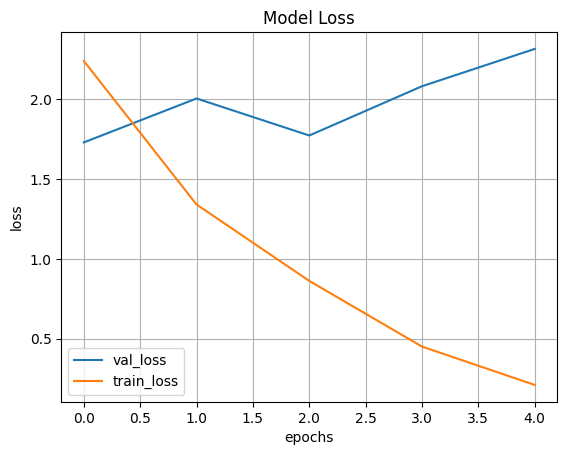

In [5]:
df = df[['epoch','train_loss','train_f1','val_loss','val_f1']]
model1 = df
fig, ax = plt.subplots()
ax.plot(model1.epoch, model1.val_loss, label='val_loss')
ax.plot(model1.epoch, model1.train_loss, label='train_loss')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_title('Model Loss')
ax.legend()
ax.grid(True)


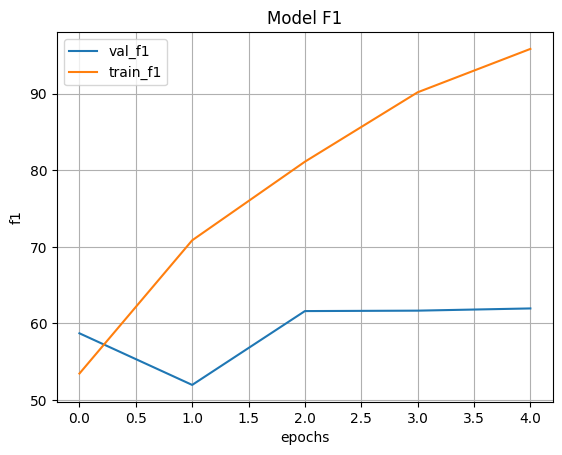

In [6]:

fig, ax = plt.subplots()
ax.plot(model1.epoch, model1.val_f1, label='val_f1')
ax.plot(model1.epoch, model1.train_f1, label='train_f1')
ax.set_xlabel('epochs')
ax.set_ylabel('f1')
ax.set_title('Model F1')
ax.legend()
ax.grid(True)